In [5]:
from typing import TypedDict, List
from langgraph.graph import StateGraph, END
import random

In [14]:
class AgentState(TypedDict):
    player_name: str
    guess: int
    guesses: List[int]
    attempts: int
    lower_bound: int
    upper_bound: int
    number: int

In [ ]:
def setup(state: AgentState) -> AgentState:
    """Node to setup the game"""
    print(f"Welcome to the game {state['player_name']}")
    state['attempts'] = 0
    state['guesses'] = []
    state['number'] = random.randint(state['lower_bound'], state['upper_bound'])
    return state
def guess_node(state: AgentState) -> AgentState:
    state['guess'] = random.randint(state['lower_bound'], state['upper_bound'])
    state['guesses'].append(state['guess'])
    state['attempts'] += 1
    return state
def hint_node(state: AgentState) -> AgentState:
    """Node to provide hints based on guessed number"""
    if state['number'] > state['guess']:
        print("Higher")
        state['lower_bound'] = state['guess']
    if state['number'] < state['guess']:
        print("Lower")
        state['upper_bound'] = state['guess']
    return state
def should_continue(state: AgentState) -> str:
    """Deteremine weather the game should continue or stop"""
    if state['attempts'] >= 7:
        print("No Attempts remaining")
        return "end"
    elif state['number'] == state['guess']:
        print(f"Guessed Correctly. The number is {state['number']}")
        return "end"
    else:
        return "continue"

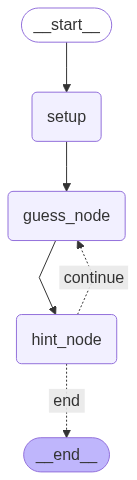

In [27]:
graph = StateGraph(AgentState)

graph.add_node("setup", setup)
graph.add_node("guess_node", guess_node)
graph.add_node("hint_node", hint_node)

graph.add_edge("setup", "guess_node")
graph.add_edge("guess_node", "hint_node")
graph.add_conditional_edges(
    "hint_node",
    should_continue,
    {
        "end": END,
        "continue": "guess_node",
    }
)
graph.set_entry_point("setup")
app = graph.compile()
app

In [36]:
app.invoke({"player_name": "Student", "guesses": [], "attempts": 0, "lower_bound": 1,
"upper_bound": 100})

Welcome to the game Student
Higher
Higher
Lower
Lower
Lower
Higher
Higher
Higher
No Attempts remaining


{'player_name': 'Student',
 'guess': 80,
 'guesses': [28, 71, 98, 92, 86, 77, 78, 80],
 'attempts': 8,
 'lower_bound': 80,
 'upper_bound': 86,
 'number': 81}